In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
import sys
sys.path.append("../")
from helpers.iaml01cw2_helpers import load_FashionMNIST

In [4]:
Xtrn, Ytrn, Xtst, Ytst = load_FashionMNIST("C:\\Users\\User\\Documents\\3. Third Year\\IAML\\IAML-CW2\\data")

In [5]:
Xtrn_orig = Xtrn.copy()
Xtst_orig = Xtst.copy()

In [6]:
Xtrn = Xtrn/255.0
Xtst = Xtst/255.0

In [7]:
Xmean = Xtrn.mean(0)

In [8]:
Xtrn_nm = Xtrn - Xmean
Xtst_nm = Xtst - Xmean

In [12]:
np.unique(Ytrn, return_counts = True), np.unique(Ytst, return_counts = True)

((array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
  array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000],
        dtype=int64)),
 (array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
  array([1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000],
        dtype=int64)))

In [8]:
Xtrn_nm[0, :4], Xtrn_nm[-1, :4]

(array([-3.13725490e-06, -2.26797386e-05, -1.17973856e-04, -4.07058824e-04]),
 array([-3.13725490e-06, -2.26797386e-05, -1.17973856e-04, -4.07058824e-04]))

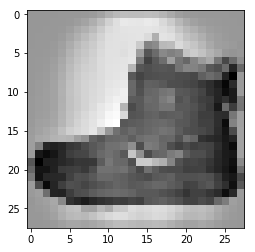

In [9]:
plt.imshow(Xtrn_nm[0].reshape((28, 28)), cmap='gray_r')

In [10]:
class_means = []
class_cf_samples = {i : None for i in range(10)}

for c in range(10):
    indices = np.where(Ytrn == c)[0]
    Xclass = np.take(Xtrn_nm, indices, 0)
    
    class_means.append(Xclass.mean(0))
    
    cdists = sorted(zip(indices ,np.apply_along_axis(lambda x: np.linalg.norm(x-class_means[c]), 1, Xclass)), key = lambda x: x[1])
    
    class_cf_samples[c] = [d[0] for d in cdists[:2] + cdists[-2:]]
    

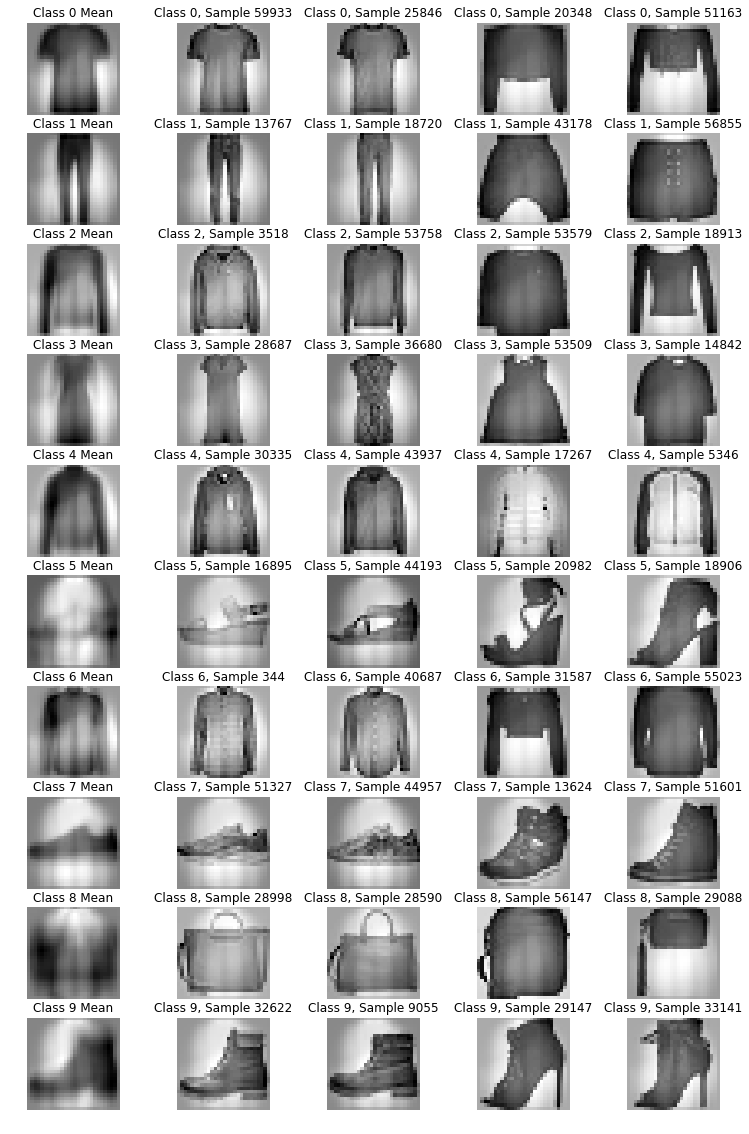

In [11]:
fig, ax = plt.subplots(nrows = 10, ncols = 5, figsize = (13, 20))

for row in range(10):
    for col in range(5):
        plt.sca(ax[row, col])
        
        if col == 0:
            plt.imshow(class_means[row].reshape((28, 28)), cmap = "gray_r")
            plt.title(f"Class {row} Mean")
        
        else:
            img = class_cf_samples[row][col-1]
            plt.imshow(Xtrn_nm[img].reshape(28, 28), cmap = "gray_r")
            plt.title(f"Class {row}, Sample {img}")
        plt.axis("off")

In [12]:
from sklearn.decomposition import PCA

C:\Users\User\anaconda3\envs\py3iaml\lib\site-packages\sklearn\utils\__init__.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Sequence


In [23]:
pca = PCA()

In [24]:
pca.fit(Xtrn_nm)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [25]:
evar = pca.explained_variance_
evar[:5]

array([19.80980567, 12.11221047,  4.10615661,  3.38182839,  2.62477022])

In [33]:
np.cumsum(evar)[-1]

68.21739795109497

(83, 186)

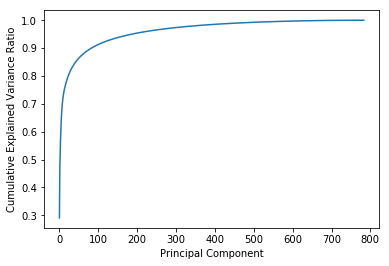

In [49]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Principal Component")
plt.ylabel("Cumulative Explained Variance Ratio")

np.where(np.cumsum(pca.explained_variance_ratio_) > 0.9)[0][0], np.where(np.cumsum(pca.explained_variance_ratio_) > 0.95)[0][0]

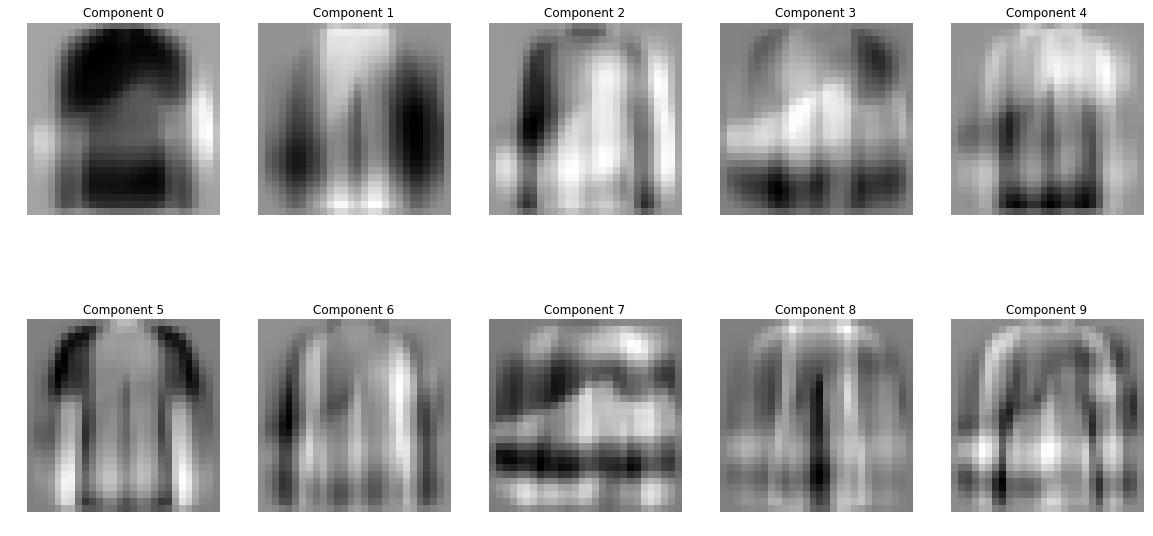

In [44]:
fig, ax = plt.subplots(nrows = 2, ncols = 5, figsize = (20, 10))
for i in range(10):
    comp_img = pca.components_[i].reshape((28, 28))
    plt.sca(ax[i//5][i%5])
    plt.imshow(comp_img, cmap="gray_r")
    plt.title(f"Component {i}")
    plt.axis("off")

In [37]:
components = pca.components_

In [39]:
components.shape

(784, 784)

In [30]:
from sklearn.metrics import mean_squared_error

table = [[] for i in range(10)]
imgs = [[] for i in range(10)]

for k in (5, 20, 50, 200):
    pca_k = PCA(k)
    pca_k.fit(Xtrn_nm)
    for c in range(10):
        X = Xtrn_nm[np.where(Ytrn == c)[0][0]].reshape(1, 784)
        Xt = pca_k.inverse_transform(pca_k.transform(X))
        imgs[c].append((Xt + Xmean).reshape((28, 28)))
        error = np.sqrt(mean_squared_error(X, Xt))
        table[c].append(np.round(error, 4))
table

[[0.2561, 0.15, 0.1276, 0.0625],
 [0.198, 0.1405, 0.0947, 0.0355],
 [0.1987, 0.1456, 0.123, 0.0799],
 [0.1457, 0.1073, 0.0835, 0.0563],
 [0.1182, 0.1026, 0.0881, 0.0476],
 [0.1811, 0.1586, 0.1429, 0.0917],
 [0.1295, 0.0958, 0.0724, 0.0452],
 [0.1656, 0.128, 0.1068, 0.0633],
 [0.2234, 0.145, 0.1236, 0.0936],
 [0.1835, 0.1506, 0.1217, 0.0705]]

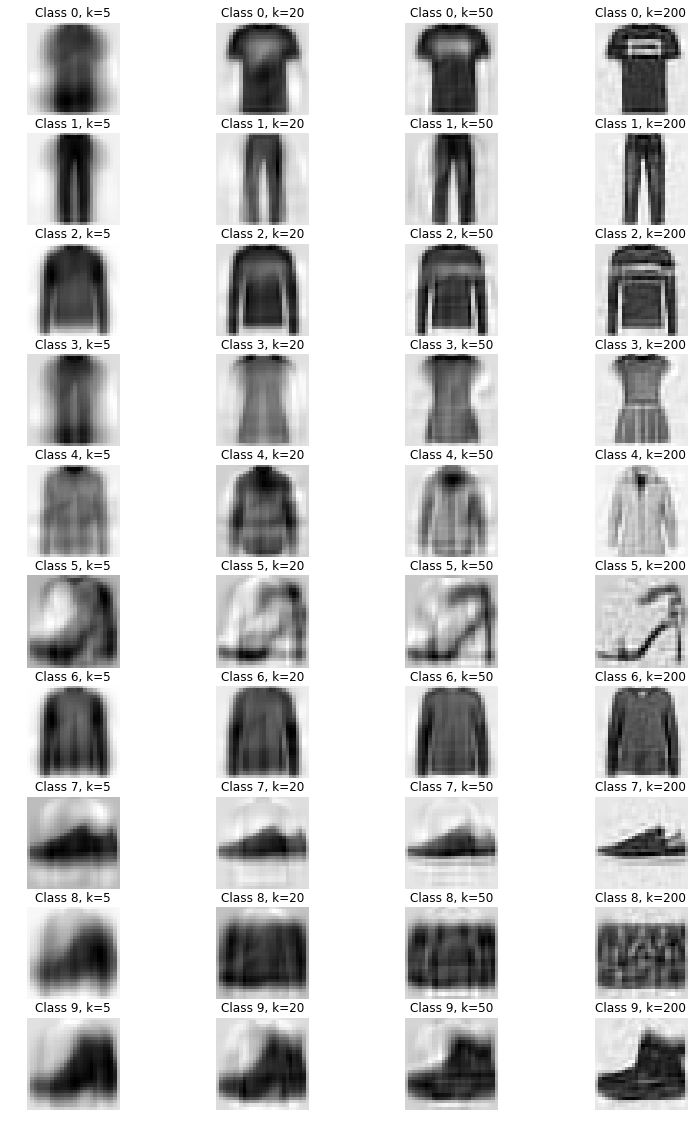

In [31]:
fig, ax = plt.subplots(nrows = 10, ncols = 4, figsize = (13, 20))
ks = (5, 20, 50, 200)

for row in range(10):
    for col in range(4):
        plt.sca(ax[row, col])
        plt.imshow(imgs[row][col], cmap= "gray_r")
        plt.title(f"Class {row}, k={ks[col]}")
        plt.axis("off")

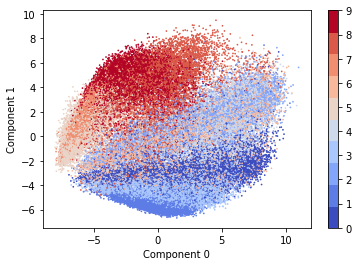

In [32]:
plt.scatter(Xtrn_pca[:, 0], Xtrn_pca[:, 1], c=Ytrn, cmap=plt.cm.get_cmap('coolwarm', 10), s=0.5)
plt.xlabel('Component 0')
plt.ylabel('Component 1')
plt.colorbar()

In [50]:
np.logspace(-2, 3, 10)

array([1.00000000e-02, 3.59381366e-02, 1.29154967e-01, 4.64158883e-01,
       1.66810054e+00, 5.99484250e+00, 2.15443469e+01, 7.74263683e+01,
       2.78255940e+02, 1.00000000e+03])